# Bootstrap Confidence Intervals

We demonstrate how to compute confidence intervals for the median of a vector using the non-parametric bootstrap.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.resampling import Bootstrap
from mltools import datasets

## The Data

Our data consist of 272 pairs of eruption durations and waiting times until the next eruption (both measured in minutes) of the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

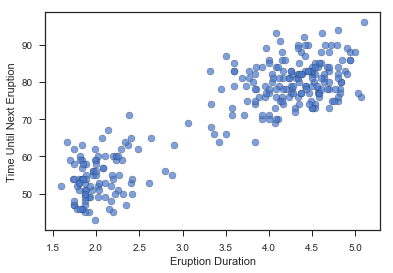

In [2]:
data = datasets.load_old_faithful()

plt.figure()
plt.scatter(data.Duration, data.Wait, c="b", edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

Suppose we wish to estimate the median eruption duration.

### Observed Median Estimate

In [3]:
median = data.Duration.median()
print(f"Observed median: {median:.2f} min")

Observed median: 4.00 min


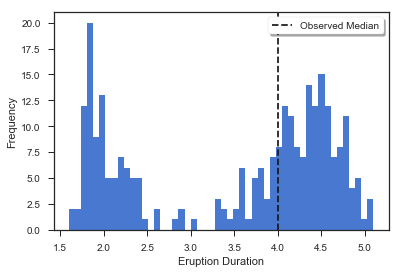

In [4]:
plt.figure()
plt.hist(data.Duration, bins=50)
plt.axvline(median, ls="--", c="k", label="Observed Median")
plt.xlabel("Eruption Duration")
plt.ylabel("Frequency")
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

We wish to quantify the accuracy of this estimate of the correlation.
One way of doing this is to report the *standard error* of our estimator.
Since the distribution of the estimator is unknown, we estimate this standard error using the bootstrap and the jackknife.

## Using the Bootstrap

MLTools provides a general-purpose bootstrap class `Bootstrap` in its `resampling` module to perform sampling distribution estimation.

In [5]:
%%time
boot = Bootstrap(data.Duration, stat=np.median, n_boot=10000, random_state=0)

CPU times: user 693 ms, sys: 15.4 ms, total: 708 ms
Wall time: 709 ms


### Estimating the Standard Error

In [6]:
se_boot = boot.se()
print(f"Bootstrap standard error: {se_boot:.3f}")

Bootstrap standard error: 0.079


### Bootstrap Confidence Intervals

In [7]:
lower_normal, upper_normal = boot.ci()
lower_pivotal, upper_pivotal = boot.ci(kind="pivotal")

print(f"95% normal CI:  ({lower_normal:.3f}, {upper_normal:.3f})")
print(f"95% pivotal CI: ({lower_pivotal:.3f}, {upper_pivotal:.3f})")

95% normal CI:  (3.845, 4.155)
95% pivotal CI: (3.892, 4.167)
